In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [2]:
for_sale_path = "For_Sale_Inventory.csv"
median_list_path = "Median_List_Price.csv"
median_sale_path = "Median_List_Price.csv"

for_sale_inventory_df = pd.read_csv(for_sale_path)
median_list_path_df = pd.read_csv(median_list_path)
median_sale_path_df = pd.read_csv(median_sale_path)

Housing Inventory: How has the housing inventory fluctuated since pre-pandemic times?

In [3]:
region_df = for_sale_inventory_df.rename(columns={"2018-03-31":"March 2018",
                                                              "2019-03-31":"March 2019",
                                                              "2020-03-31":"March 2020",
                                                              "2021-03-31":"March 2021",
                                                              "2022-03-31":"March 2022",
                                                              "2023-03-31":"March 2023"})
housing_inventory = region_df[["RegionID","RegionName","RegionType","StateName",
                                           "March 2018","March 2019","March 2020","March 2021",
                                           "March 2022","March 2023"]].copy()
housing_inventory   

,RegionID,RegionName,RegionType,StateName,March 2018,March 2019,March 2020,March 2021,March 2022,March 2023
0,102001,United States,country,NaN,1421528.0,1449965.0,1309043.0,882081.0,726913.0,835429.0
1,394913,"New York, NY",msa,NY,73707.0,78192.0,74371.0,61966.0,48039.0,43253.0
2,753899,"Los Angeles, CA",msa,CA,21998.0,27132.0,21194.0,19497.0,14653.0,15214.0
3,394463,"Chicago, IL",msa,IL,38581.0,39387.0,39339.0,30715.0,22775.0,20922.0
4,394514,"Dallas, TX",msa,TX,24043.0,28543.0,27993.0,17931.0,14911.0,17053.0
...,...,...,...,...,...,...,...,...,...,...
923,753929,"Zapata, TX",msa,TX,55.0,47.0,42.0,22.0,43.0,49.0
924,394743,"Ketchikan, AK",msa,AK,77.0,80.0,79.0,63.0,61.0,61.0
925,753874,"Craig, CO",msa,CO,115.0,104.0,134.0,83.0,52.0,48.0
926,395188,"Vernon, TX",msa,TX,21.0,47.0,35.0,16.0,28.0,40.0


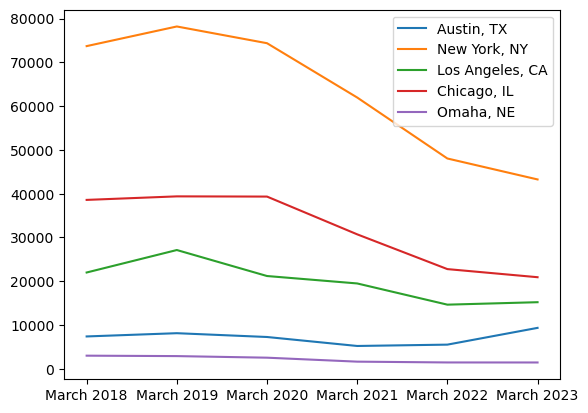

In [5]:
# Create a variable for each city we are analyzing for this project
homes_in_austin_tx = housing_inventory.loc[housing_inventory["RegionName"] == "Austin, TX"]
homes_in_omaha_ne = housing_inventory.loc[housing_inventory["RegionName"] == "Omaha, NE"]
homes_in_chicago_il = housing_inventory.loc[housing_inventory["RegionName"] == "Chicago, IL"]
homes_in_ny_ny = housing_inventory.loc[housing_inventory["RegionName"] == "New York, NY"]
homes_in_la_ca = housing_inventory.loc[housing_inventory["RegionName"] == "Los Angeles, CA"]


# Make a DataFrame using the loc function to find specific cities 
inventory_comparison = housing_inventory.loc[(housing_inventory["RegionName"] == "Austin, TX") |
                                             (housing_inventory["RegionName"] == "Omaha, NE") |
                                             (housing_inventory["RegionName"] == "Chicago, IL") |
                                             (housing_inventory["RegionName"] == "New York, NY") |
                                             (housing_inventory["RegionName"] == "Los Angeles, CA")
                                            ]

# Reset index to match the city and state we are analyzing 
inventory_comparison.set_index("RegionName")

# Find the row where each city is located 
housing_inventory.loc[housing_inventory["RegionName"] == "Omaha, NE"]
housing_inventory.loc[housing_inventory["RegionName"] == "New York, NY"]
housing_inventory.loc[housing_inventory["RegionName"] == "Chicago, IL"]
housing_inventory.loc[housing_inventory["RegionName"] == "Los Angeles, CA"]
housing_inventory.loc[housing_inventory["RegionName"] == "Austin, TX"]

# Find the inventory over the five-year period for each city 
ny_ny_inventory = housing_inventory.iloc[1,4:].to_list()
om_ne_inventory = housing_inventory.iloc[58,4:].to_list()
ch_il_inventory = housing_inventory.iloc[3,4:].to_list()
los_ca_inventory = housing_inventory.iloc[2,4:].to_list()
au_tx_inventory = housing_inventory.iloc[29,4:].to_list()

# Create a DataFrame that displays the housing inventory over a 5-year period for the five cities in the US
df = pd.DataFrame({
    "Austin, TX": au_tx_inventory,
    "New York, NY": ny_ny_inventory,
    "Los Angeles, CA": los_ca_inventory,
    "Chicago, IL": ch_il_inventory,
    "Omaha, NE": om_ne_inventory
}, index = ["March 2018","March 2019","March 2020","March 2021","March 2022","March 2023"])

line = df.plot.line()


How has the Pandemic impacted Home Sale Prices from 2018-2023 and how have home prices changed since the beginning of the pandemic? Which city/cities saw the greatest rate of increase in price? 

In [ ]:
def calculate_rate_of_increase(prices):
    return (prices.iloc[-1] - prices.iloc[0]) / prices.iloc[0] * 100



In [ ]:
city_groups = df.groupby('RegionName')['Price'].apply(calculate_rate_of_increase)

List vs. Sold Listing prices that are currently available in the US?

In [ ]:
Where are the most affordable places to live in the United States in 2023 based on median price?